In [1]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


demographics_df = pd.read_csv('DEMOGRAPHICS.csv')
competition_df = pd.read_csv('COMPETITION.csv')
stores_df = pd.read_csv('STORES.csv')

In [2]:
print(demographics_df.head())
print(competition_df.head())
print(stores_df.head())

print(demographics_df.describe())
print(stores_df.describe())

   STORE Urban_Rural                                Market_Name  ST  \
0      1           U                                  Knoxville  TN   
1     10           R                                    Atlanta  GA   
2    100           U  Santa Barbara-Santa Maria-San Luis Obispo  CA   
3    100           U  Santa Barbara-Santa Maria-San Luis Obispo  CA   
4    101           U                                Los Angeles  CA   

   Population  Asian_Pop  African_American_Pop  Hispanic_Pop  House_Holds  \
0       37139        487                  2087        1628.0      15272.0   
1           1        112                   133           NaN       5835.0   
2       47292       2432                   579           NaN      20007.0   
3       47292       2432                   579           NaN      20007.0   
4       48090       7280                  8173       26102.0      15018.0   

   Median_Age  Median_Income  Median_Housing_Value  Total_Older_Vehicles  \
0   41.955863    56704.90525      

In [3]:
demographics_df.isnull().sum()

STORE                    0
Urban_Rural              0
Market_Name              0
ST                       0
Population               0
Asian_Pop                0
African_American_Pop     0
Hispanic_Pop            31
House_Holds              1
Median_Age               0
Median_Income            1
Median_Housing_Value     1
Total_Older_Vehicles    17
Total_Vehicles          18
dtype: int64

In [4]:
demographics_df.fillna(demographics_df.median(), inplace=True)

In [5]:
demographics_df.isnull().sum()

STORE                   0
Urban_Rural             0
Market_Name             0
ST                      0
Population              0
Asian_Pop               0
African_American_Pop    0
Hispanic_Pop            0
House_Holds             0
Median_Age              0
Median_Income           0
Median_Housing_Value    0
Total_Older_Vehicles    0
Total_Vehicles          0
dtype: int64

In [6]:
stores_df[['Lat', 'Lon']] = stores_df['Location'].str.split(',', expand=True).astype(float)
competition_df[['Lat', 'Lon']] = competition_df['Location'].str.extract(r'LAT:(\d+\.\d+),LON:(-?\d+\.\d+)').astype(float)

In [7]:
def calculate_distance(row, lat, lon):
    return geodesic((row['Lat'], row['Lon']), (lat, lon)).miles

In [8]:
def find_closest_competitor(store_row):
    distances = competition_df.apply(lambda row: calculate_distance(row, store_row['Lat'], store_row['Lon']), axis=1)
    return distances.min()

stores_df['distance_to_competitor'] = stores_df.apply(find_closest_competitor, axis=1)

In [9]:
stores_df = pd.merge(stores_df, demographics_df, how='left', on='STORE')

In [10]:
stores_df.head()

,STORE,STORE_TYPE,Open Date,Sales,Location,Lat,Lon,distance_to_competitor,Urban_Rural,Market_Name,...,Population,Asian_Pop,African_American_Pop,Hispanic_Pop,House_Holds,Median_Age,Median_Income,Median_Housing_Value,Total_Older_Vehicles,Total_Vehicles
0,1,S,28-Jul-84,123399.58450,"35.764274,-83.969812",35.764274,-83.969812,1743.911931,U,Knoxville,...,37139,487,2087,1628.0,15272.0,41.955863,56704.90525,163494.08900,30134.19886,37715.07648
1,2,S,17-Apr-85,71429.06303,"38.553729,-90.320663",38.553729,-90.320663,1397.019036,U,St. Louis,...,38902,2157,1033,1160.0,17280.0,40.870626,60800.25623,155890.30020,24018.74967,32208.37152
2,3,S,5/7/1995,81573.68861,"33.979354,-88.473433",33.979354,-88.473433,1500.170703,R,Columbus-Tupelo,...,21122,115,4028,322.0,8318.0,42.216689,40564.91795,99270.27038,16512.79466,20310.86913
3,4,S,14-Jul-92,163121.57990,"40.40126,-86.85747",40.401260,-86.857470,1597.158650,U,Lafayette IN,...,23245,356,1738,4419.0,10007.0,34.422207,46588.53452,95069.52144,15787.10136,19450.96845
4,5,S,11/2/2004,121692.97470,"28.118499,-81.640427",28.118499,-81.640427,1986.878707,U,Tampa-St. Petersburg,...,23755,320,5507,11492.0,7732.0,40.258839,33676.32275,120088.66610,13951.14431,19445.23473


In [11]:
features = ['Population', 'Asian_Pop', 'African_American_Pop', 'Hispanic_Pop', 
                      'House_Holds', 'Median_Age', 'Median_Income', 'Median_Housing_Value', 
                      'Total_Older_Vehicles', 'Total_Vehicles','distance_to_competitor']
X = stores_df[features]
y = stores_df['Sales']

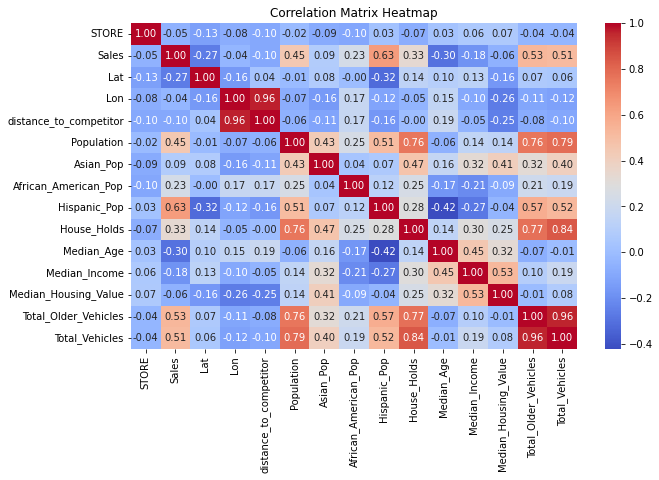

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = stores_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

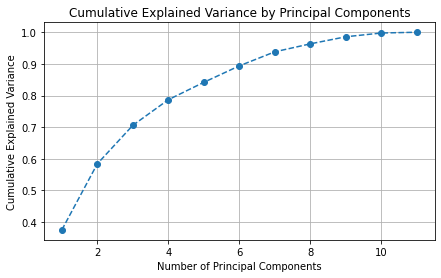

Reduced dataset shape: (477, 7)


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(7, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

n_components = sum(explained_variance.cumsum() <= 0.95)


pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_test_r = pca.transform(X_test_s)


print(f"Reduced dataset shape: {X_pca_reduced.shape}")


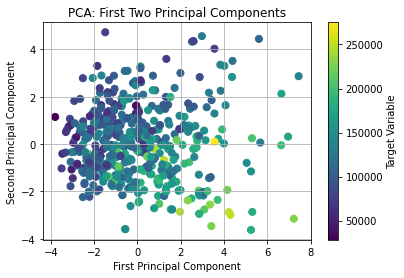

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_train, cmap='viridis', s=50)
plt.title('PCA: First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

In [17]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

In [18]:
lr_model = LinearRegression() 
lr_model.fit(X_scaled, y_train)  
y_pred_lr = lr_model.predict(X_test_s) 
print("Linear Regression Performance:")
evaluate_model(y_test, y_pred_lr)

Linear Regression Performance:
RMSE: 28813.819380628018
MAE: 22085.870739193873
MSE: 830236187.2994548
R-squared: 0.4902557608101167


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_s)
print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

Random Forest Performance:
RMSE: 26036.501879075713
MAE: 20344.36306613749
MSE: 677899430.0991132
R-squared: 0.5837867169255405


In [20]:
import xgboost as xgb
#Train an Advanced Model - XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # Initialize XGBoost model
xgb_model.fit(X_scaled, y_train)  # Train the model on the training data
y_pred_xgb = xgb_model.predict(X_test_s)  # Predict on the testing data
print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

XGBoost Performance:
RMSE: 27789.258245970934
MAE: 20793.803911624997
MSE: 772242873.8612635
R-squared: 0.5258622037583675


In [21]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_scaled, y_train)
best_rf_model = grid_search_rf.best_estimator_ 
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
y_pred_rf_tuned = best_rf_model.predict(X_test_s)

print("Tuned Random Forest Performance:")
evaluate_model(y_test, y_pred_rf_tuned) 

Tuned Random Forest Performance:
RMSE: 26002.036414475137
MAE: 20323.27352700999
MSE: 676105897.6996909
R-squared: 0.5848879009288297


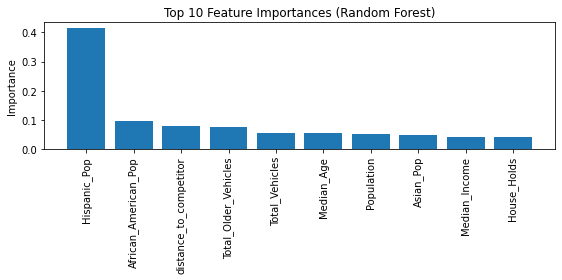

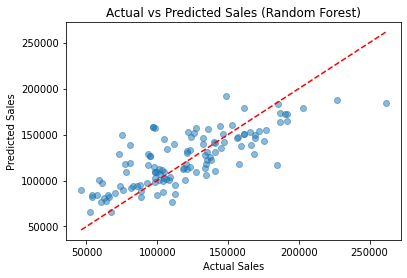

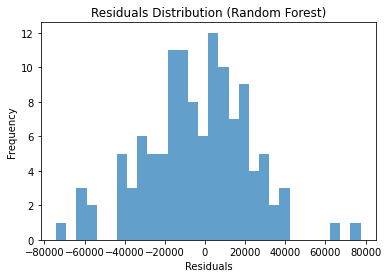

In [23]:
import matplotlib.pyplot as plt
import numpy as np

importances_rf = best_rf_model.feature_importances_

indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(8, 4))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances_rf[indices_rf[:10]], align="center")
plt.xticks(range(10), X_train.columns[indices_rf[:10]], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


plt.scatter(y_test, y_pred_rf_tuned, alpha=0.5)
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


residuals_rf = y_test - y_pred_rf_tuned
plt.hist(residuals_rf, bins=30, alpha=0.7)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


importances_rf = best_rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf_model = RandomForestRegressor(
    bootstrap=True, 
    max_depth=20,
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=100, 
)


scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')


print(f"Cross-validated MAE scores: {-scores}")
print(f"Mean MAE: {-scores.mean()}, Standard Deviation: {scores.std()}")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Fold MAE: {mae}, MSE: {mse}, R-squared: {r2}")


Cross-validated MAE scores: [20291.94466763 23913.97619587 22634.96843172 19498.10250581
 21226.72695257]
Mean MAE: 21513.143750720046, Standard Deviation: 1590.9896320259256
Fold MAE: 20732.16081767249, MSE: 698114393.3795522, R-squared: 0.5713752354275387
Fold MAE: 24245.329256096364, MSE: 1011343323.3951427, R-squared: 0.5002310699543637
Fold MAE: 22236.126400181234, MSE: 779056095.6858026, R-squared: 0.5165260740416465
Fold MAE: 20087.096223778568, MSE: 670508371.6667271, R-squared: 0.5745640185238068
Fold MAE: 21171.986693077735, MSE: 750938310.491763, R-squared: 0.5396112139779052


In [26]:
potential_sites_df = pd.read_csv('POTENTIAL_SITES.csv')

potential_sites_df[['Lat', 'Lon']] = potential_sites_df['Location'].str.split(',', expand=True).astype(float)
potential_sites_df['distance_to_competitor'] = potential_sites_df.apply(find_closest_competitor, axis=1)

potential_sites_df = pd.merge(potential_sites_df, demographics_df, how='left', on='STORE')


In [27]:
X_new = potential_sites_df[features]
x_new_scaled = scaler.transform(X_new)

predicted_sales = best_rf_model.predict(x_new_scaled)

potential_sites_df['Predicted_Sales'] = predicted_sales
potential_sites_df[['STORE', 'Predicted_Sales','distance_to_competitor']].to_csv('sales_predictions.csv', index=False)
print(f"Predicted sales for potential sites have been saved")


Predicted sales for potential sites have been saved


['U' 'R']


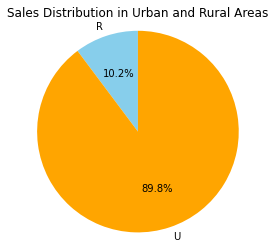

In [28]:
print(stores_df['Urban_Rural'].unique())

sales_distribution = stores_df.groupby('Urban_Rural')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_distribution, labels=sales_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Sales Distribution in Urban and Rural Areas')
plt.axis('equal')
plt.show()


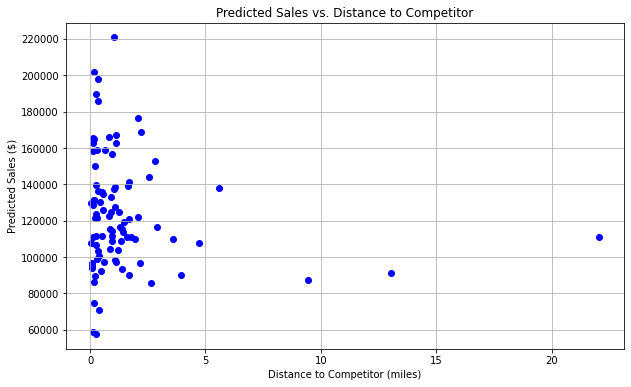

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(potential_sites_df['distance_to_competitor'], potential_sites_df['Predicted_Sales'], color='blue')
plt.title('Predicted Sales vs. Distance to Competitor')
plt.xlabel('Distance to Competitor (miles)')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)
plt.show()

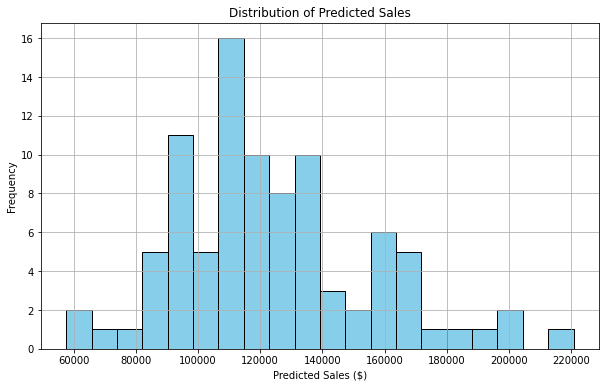

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(potential_sites_df['Predicted_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Sales')
plt.xlabel('Predicted Sales ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

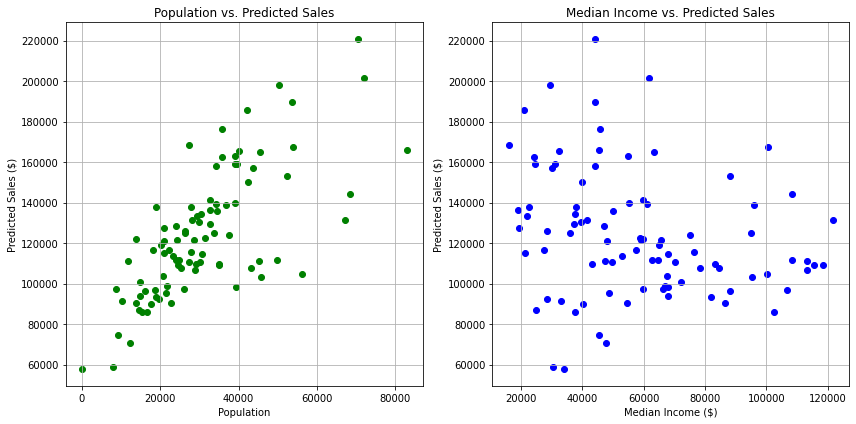

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(potential_sites_df['Population'], potential_sites_df['Predicted_Sales'], color='green')
plt.title('Population vs. Predicted Sales')
plt.xlabel('Population')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(potential_sites_df['Median_Income'], potential_sites_df['Predicted_Sales'], color='blue')
plt.title('Median Income vs. Predicted Sales')
plt.xlabel('Median Income ($)')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)

plt.tight_layout()
plt.show()